In [2]:
#hdf5 files

scripts_path = '../../scripts'
import sys
sys.path.append(scripts_path)
import numpy as np
import matplotlib.pyplot as plt
import signal_processing as sp
from creating_datasets import make_tsfresh_structure_from_directory
from numpy.fft import fft, fftfreq
path_to_hdf5_directory  = '../data/hdf5_adaptive/'

data_hdf5_long, label_hdf5 = make_tsfresh_structure_from_directory('../data/hdf5_adaptive/')
data_hdf5_long = data_hdf5_long.reset_index(drop=True)

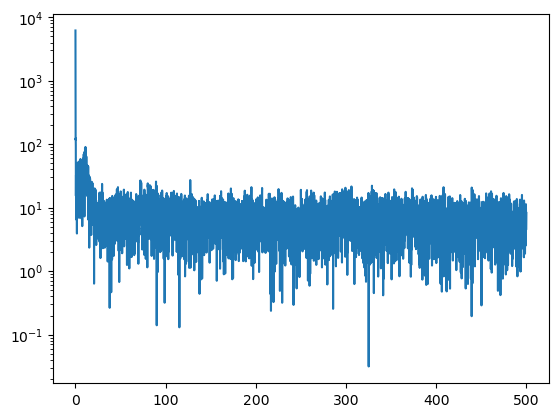

In [7]:
y = data_hdf5_long[data_hdf5_long['id'] == 200]['raw'].reset_index(drop=True)
x =data_hdf5_long[data_hdf5_long['id'] == 200]['time'].reset_index(drop=True)
yf = np.abs(fft(y))
N = len(yf)
xf= fftfreq(N, 1/1000)
plt.plot(xf[:N//2], yf[:N//2])
# plt.xlim([0,2])
plt.yscale('log')

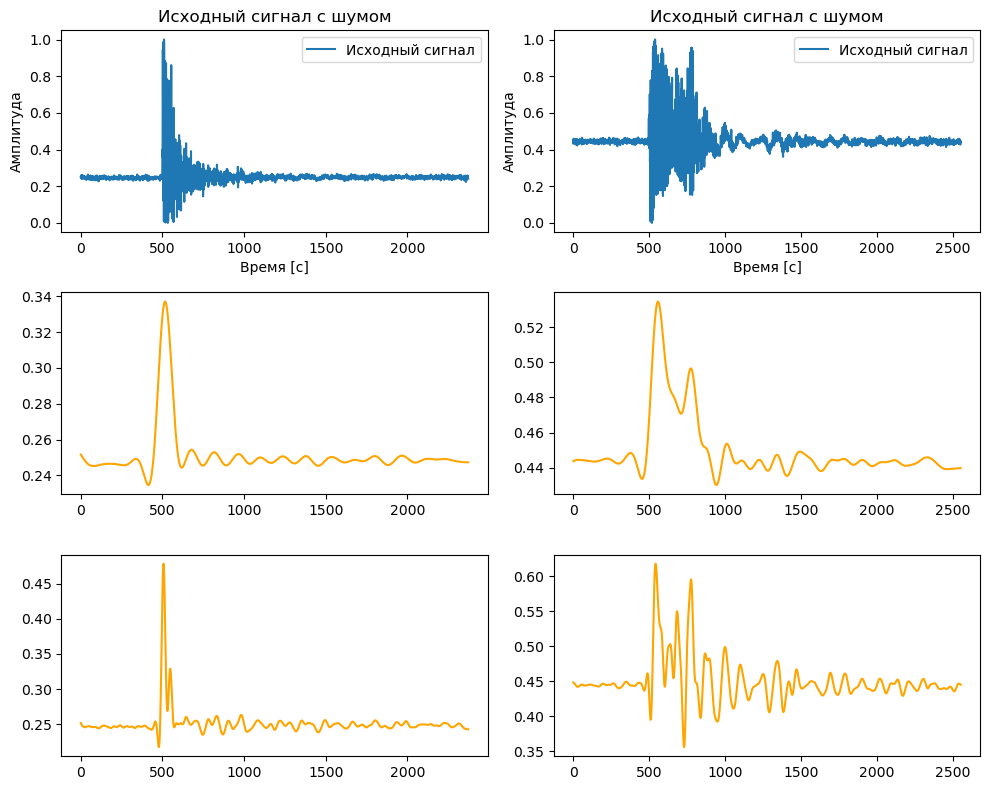

In [317]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def butterworth_filter(data, order, cutoff, fs):
    """
    Применяет фильтр Баттерворта к данным.
    
    :param data: Входной массив данных (сигнал)
    :param order: Порядок фильтра
    :param cutoff: Частота отсечки в Гц
    :param fs: Частота дискретизации в Гц
    :return: Отфильтрованный массив данных
    """
    # Нормализуем частоту отсечки
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    
    # Получаем коэффициенты фильтра Баттерворта
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    
    # Применяем фильтр к данным
    filtered_data = filtfilt(b, a, data)
    
    return filtered_data

# Пример использования функции
if __name__ == "__main__":
    # Параметры сигнала
    fs = 1000            # Частота дискретизации
    
    interaction_1 = 'hit_z'
    idx_interest_1 = np.where(label_hdf5 == interaction_1)
    interaction_2 = 'hit_g'
    idx_interest_2 = np.where(label_hdf5 == interaction_2)
    id_1 = np.random.choice(idx_interest_1[0])
    id_2 = np.random.choice(idx_interest_2[0])
    
    t_1 = data_hdf5_long[data_hdf5_long['id'] == id_1]['time'].reset_index(drop=True)
    signal_1 = data_hdf5_long[data_hdf5_long['id'] == id_1]['raw'].reset_index(drop=True)


    t_2 = data_hdf5_long[data_hdf5_long['id'] == id_2]['time'].reset_index(drop=True)
    signal_2 = data_hdf5_long[data_hdf5_long['id'] == id_2]['raw'].reset_index(drop=True)
    # Параметры фильтра
    order = 4          # Порядок фильтра
    cutoff = 100        # Частота отсечки

    # Применяем фильтр Баттерворта
    filtered_signal_1 = butterworth_filter(signal_1, order, cutoff, fs)
    filtered_signal_2 = butterworth_filter(signal_2, order, cutoff, fs)

    # Визуализация результатов
    fig, ax = plt.subplots(3,2, figsize = (10, 8))
    
    ax[0][0].plot(t_1, signal_1, label='Исходный сигнал')
    ax[0][0].set_title('Исходный сигнал с шумом')
    ax[0][0].set_xlabel('Время [с]')
    ax[0][0].set_ylabel('Амплитуда')
    ax[0][0].legend()
    

    ax[0][1].plot(t_2, signal_2, label='Исходный сигнал')
    ax[0][1].set_title('Исходный сигнал с шумом')
    ax[0][1].set_xlabel('Время [с]')
    ax[0][1].set_ylabel('Амплитуда')
    ax[0][1].legend()
    
    ax[1][0].plot(t_1, butterworth_filter(signal_1, order, 7, fs), label='Отфильтрованный сигнал 5', color='orange')
    ax[1][1].plot(t_2, butterworth_filter(signal_2, order, 7, fs), label='Отфильтрованный сигнал 5', color='orange')
    
    ax[2][0].plot(t_1, butterworth_filter(signal_1, order, 25, fs), label='Отфильтрованный сигнал 5', color='orange')
    ax[2][1].plot(t_2, butterworth_filter(signal_2, order, 25, fs), label='Отфильтрованный сигнал 5', color='orange')
    
    # ax[3][0].plot(t_1, butterworth_filter(signal_1, order, 50, fs), label='Отфильтрованный сигнал 5', color='orange')
    # ax[3][1].plot(t_2, butterworth_filter(signal_2, order, 50, fs), label='Отфильтрованный сигнал 5', color='orange')
    # plt.subplot(8, 2, 1)
    # plt.plot(t_1, butterworth_filter(signal_1, order, 2, fs), label='Отфильтрованный сигнал 5', color='orange')
    # plt.subplot(8, 2, 2)
    # plt.plot(t_2, butterworth_filter(signal_2, order, 2, fs), label='Отфильтрованный сигнал 5', color='orange')
    
    # plt.subplot(8, 3, 1)
    # plt.plot(t_1, butterworth_filter(signal_1, order, 30, fs), label='Отфильтрованный сигнал 15', color='blue')
    # plt.subplot(8, 3, 2)
    # plt.plot(t_2, butterworth_filter(signal_2, order, 30, fs), label='Отфильтрованный сигнал 15', color='blue')

    # plt.subplot(8, 4, 1)
    # plt.plot(t_1, butterworth_filter(signal_1, order, 50, fs), label='Отфильтрованный сигнал 50', color='green')
    # plt.subplot(8, 4, 2)
    # plt.plot(t_2, butterworth_filter(signal_2, order, 50, fs), label='Отфильтрованный сигнал 50', color='green')
    
    # plt.title('Отфильтрованный сигнал')
    # plt.xlabel('Время [с]')
    # plt.ylabel('Амплитуда')
    # plt.legend()

    plt.tight_layout()
    plt.show()

(0.0, 20.0)

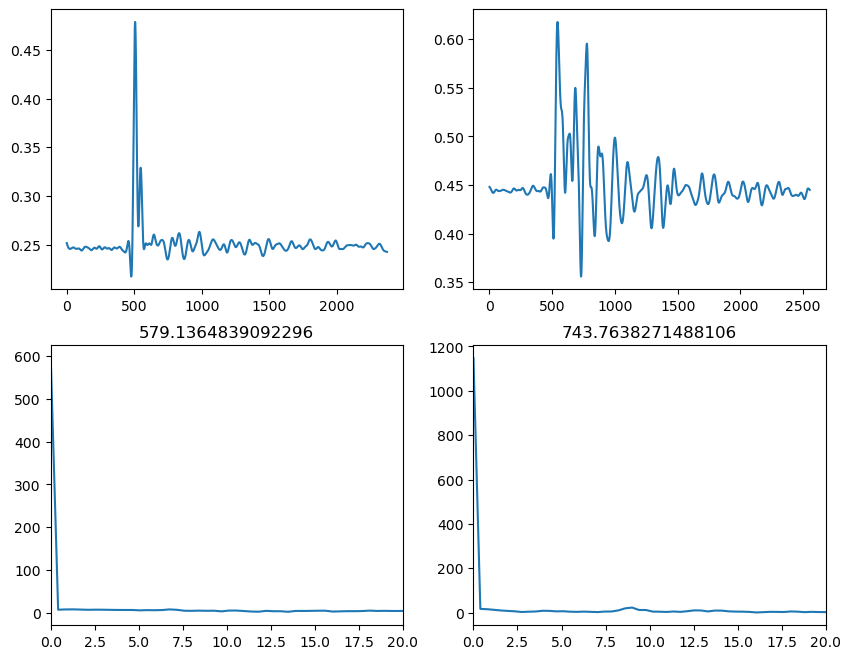

In [318]:
t_1, t_2
s1 = butterworth_filter(signal_1, order, 25, fs)
s2 = butterworth_filter(signal_2, order, 25, fs)

s1f = np.abs(fft(s1))
s2f = np.abs(fft(s2))
s3 = 0.3+ 0.2*np.sin(0.055*t_2)
s3f = np.abs(fft(s3))
N1 = len(s1f)
N2 = len(s2f)
x1f = fftfreq(N1, 1/1000)
x2f = fftfreq(N2, 1/1000)

fig, ax = plt.subplots(2,2, figsize = (10,8))
ax[0][0].plot(t_1, s1)
ax[0][1].plot(t_2, s2)
# ax[0][1].plot(t_2, )

ax[1][0].plot(x1f[:N1//2], s1f[:N1//2])
ax[1][0].set_title(np.trapz(s1f[1:]))
ax[1][0].set_xlim([0, 20])
ax[1][1].plot(x2f[:N2//2], s2f[:N2//2])
ax[1][1].set_title(np.trapz(s2f[1:]))
# ax[1][1].plot(x2f[:N2//2], s3f[:N2//2])
ax[1][1].set_xlim([0, 20])

In [300]:
s2f[1:]

array([36.92028297, 30.47566363, 23.1226042 , ..., 23.1226042 ,
       30.47566363, 36.92028297])

In [ ]:

y = data_hdf5_long[data_hdf5_long['id'] == 200]['raw'].reset_index(drop=True)
x =data_hdf5_long[data_hdf5_long['id'] == 200]['time'].reset_index(drop=True)

In [4]:
from scipy.signal import butter, lfilter
from scipy.signal import freqz
import matplotlib.pyplot as plt
# фильтр баттерворда имеет хорошую ачх, нормис
def butter_bandpass(highcut, fs, order=5):
    return butter(order, highcut, fs=fs, btype='low')
def butter_bandpass_filter(data, highcut, fs, order=5):
    b, a = butter_bandpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

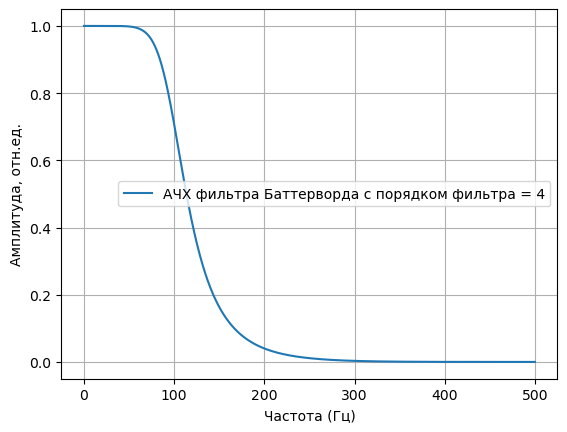

In [10]:
fs = 1e3 # частота дискретизации
highcut = 100 # частота отчечки фильтра баттерворда, по хорошему надо брать 2*частоту генератора,
                # то есть около 120 МГц, но фильтруется заебись при 1 МГц отсечке.

plt.figure(1)
plt.clf()

N = 5000
d = 1/fs
# xf = np.fft.fftfreq(N, d)
# spectrum = np.abs(np.fft.fft(mixed_S1))
# spectrum = (spectrum - spectrum.min()) / (spectrum.max() - spectrum.min()) 
# plt.plot(xf[:N//2], spectrum[:N//2], label = "Спектр сигнала")

b, a = butter_bandpass(highcut, fs, order=4)
w, h = freqz(b, a, fs=fs, worN=2048)
plt.plot(w, abs(h), label="АЧХ фильтра Баттерворда с порядком фильтра = %d" % 4)
# plt.xlim([0, 1e8])
# plt.ylim([0, 1.5])
plt.xlabel('Частота (Гц)')

plt.ylabel('Амплитуда, отн.ед.')
plt.grid(True)
plt.legend(loc='best')

In [2]:
import json
import os
os.getcwd()

'/home/drozdovmk/Projects/ZB/zb-classification/RnD/notebooks'

In [6]:
file_path = '../auto_cutter/ioes_python_detector.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [16]:
class Animal:
    def __init__(self, name, age=None, **kwargs):
        self.name = name
        self.age = age
        self.species = kwargs.get('species', 'Unknown')
        print(f"Animal created: {self.name}, Age: {self.age}, Species: {self.species}")

class Dog(Animal):
    def __init__(self, breed, *args, **kwargs):
        # Передаем все позиционные и именованные аргументы в инициализатор родительского класса
        super().__init__(*args, **kwargs)  # Вызов конструктора родительского класса
        self.breed = breed
        print(f"Dog created: {self.name}, Breed: {self.breed}, Age: {self.age}")

# Пример использования
dog = Dog(breed='Golden Retriever', name='Buddy', age=3, species='Canine')

Animal created: Buddy, Age: 3, Species: Canine
Dog created: Buddy, Breed: Golden Retriever, Age: 3


In [2]:
from tslearn.svm import TimeSeriesSVC
from tslearn.generators import random_walk_blobs
X, y = random_walk_blobs(n_ts_per_blob=10, sz=64, d=2, n_blobs=2)
clf = TimeSeriesSVC(kernel="gak", gamma="auto", probability=True)
clf.fit(X, y).predict(X).shape

sv = clf.support_vectors_
len(sv)  # should be equal to the nr of classes in the clf problem

sv[0].shape  

sv_sum = sum([sv_i.shape[0] for sv_i in sv])
sv_sum == clf.svm_estimator_.n_support_.sum()

clf.decision_function(X).shape

clf.predict_log_proba(X).shape

clf.predict_proba(X)


array([[0.91744709, 0.08255291],
       [0.91765957, 0.08234043],
       [0.91735255, 0.08264745],
       [0.91743958, 0.08256042],
       [0.91765713, 0.08234287],
       [0.91735311, 0.08264689],
       [0.91735255, 0.08264745],
       [0.91732266, 0.08267734],
       [0.91735452, 0.08264548],
       [0.91799446, 0.08200554],
       [0.08279032, 0.91720968],
       [0.08210559, 0.91789441],
       [0.08267052, 0.91732948],
       [0.08284768, 0.91715232],
       [0.08281827, 0.91718173],
       [0.08279008, 0.91720992],
       [0.08281419, 0.91718581],
       [0.08278449, 0.91721551],
       [0.08285229, 0.91714771],
       [0.08280389, 0.91719611]])

In [12]:
X.shape

(20, 64, 2)

In [6]:
from tslearn.utils import to_time_series_dataset

In [13]:
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2]
my_third_time_series = [1, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series,
                                            my_second_time_series,
                                            my_third_time_series])
print(formatted_dataset.shape)

(3, 4, 1)


In [36]:
from tslearn.utils import to_time_series_dataset
X = to_time_series_dataset([[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]])
y = [0, 0, 1]

from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak", probability=True)
clf.fit(X, y)

from tslearn.neighbors import KNeighborsTimeSeriesClassifier
knn = KNeighborsTimeSeriesClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsTimeSeriesClassifier(n_neighbors=2)

In [40]:
to_time_series_dataset([1,2,5])

(1, 3, 1)

In [41]:
import numpy as np
clf.predict_proba(to_time_series_dataset([1,2,5]))

array([[0.74779373, 0.25220627]])

In [35]:

knn.predict_proba([1,2,3])


AttributeError: 'list' object has no attribute 'shape'

In [6]:
import json
d = {"hit": 0.15, "perelaz": 0.14, "saw": 0.31, "wind": 0.41}
json.dumps(d)

'{"hit": 0.15, "perelaz": 0.14, "saw": 0.31, "wind": 0.41}'

In [7]:
json.loads(json.dumps(d))

{'hit': 0.15, 'perelaz': 0.14, 'saw': 0.31, 'wind': 0.41}